In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
df.shape

(9357, 15)

In [7]:
X = df.drop(['Date','Time','AH'],axis=1)

In [8]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001


In [9]:
X.shape

(9357, 12)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 877.3 KB


In [11]:
y = df['AH']

In [12]:
y[0:5]

0    0.757754
1    0.725487
2    0.750239
3    0.786713
4    0.788794
Name: AH, dtype: float64

#Correlation

In [13]:
import seaborn as sns
corr = X.corr()

In [14]:
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922


[Text(0.5, 0, 'CO(GT)'),
 Text(1.5, 0, 'PT08.S1(CO)'),
 Text(2.5, 0, 'NMHC(GT)'),
 Text(3.5, 0, 'C6H6(GT)'),
 Text(4.5, 0, 'PT08.S2(NMHC)'),
 Text(5.5, 0, 'NOx(GT)'),
 Text(6.5, 0, 'PT08.S3(NOx)'),
 Text(7.5, 0, 'NO2(GT)'),
 Text(8.5, 0, 'PT08.S4(NO2)'),
 Text(9.5, 0, 'PT08.S5(O3)'),
 Text(10.5, 0, 'T'),
 Text(11.5, 0, 'RH')]

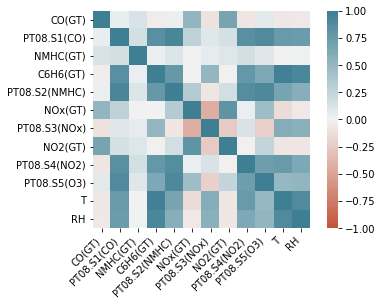

In [15]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

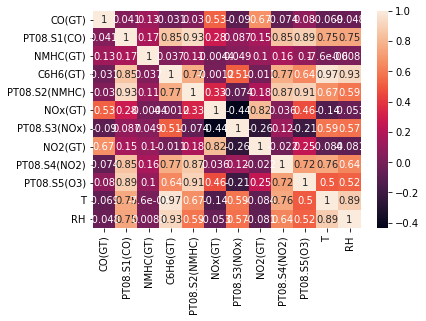

In [16]:
ax = sns.heatmap(corr, annot=True)

#outliers

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)
print(z.shape)

[[0.4739999  0.94339273 2.21123554 ... 0.64029229 0.08850233 0.18337935]
 [0.46627322 0.73796482 1.93938293 ... 0.00591277 0.08155806 0.16043589]
 [0.46884878 1.07074288 1.76768654 ... 0.21678449 0.04915151 0.28296361]
 ...
 [0.47142434 0.28238484 0.29267014 ... 0.25618056 0.39636464 0.41266181]
 [0.467561   0.14059957 0.29267014 ... 0.44911861 0.4293499  0.50638818]
 [0.46884878 0.06634442 0.29267014 ... 0.34789258 0.43340073 0.51468687]]
(9357, 12)


In [18]:
threshold = 3
print(np.where(z > 3))

(array([  10,   11,   24, ..., 8777, 8777, 8777]), array([ 6,  6,  2, ...,  8, 10, 11]))


In [19]:
print(np.where(z < 3))

(array([   0,    0,    0, ..., 9356, 9356, 9356]), array([ 0,  1,  2, ...,  9, 10, 11]))


##Outliers: Correcting, Removing

In [20]:
X_o = X[(z < 3).all(axis=1)]
X_i = X[~((z < 3).all(axis=1))]

print("Original Dataset Shape: ",X.shape)
print("Outlier in the Dataset Shape: ",X_o.shape)
print("Without Outlier in the Dataset Shape: ",X_i.shape)

Original Dataset Shape:  (9357, 12)
Outlier in the Dataset Shape:  (8577, 12)
Without Outlier in the Dataset Shape:  (780, 12)


##Using IQR Score


In [21]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)


X_out = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
X_in = X[((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]


print("Original Dataset Shape: ",X.shape)
print("Outlier in the Dataset Shape: ",X_out.shape)
print("Without Outlier in the Dataset Shape: ",X_in.shape)

Original Dataset Shape:  (9357, 12)
Outlier in the Dataset Shape:  (5463, 12)
Without Outlier in the Dataset Shape:  (3894, 12)


#Removing features with low variance

In [22]:

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 877.3 KB


#Normality test

In [24]:
from scipy.stats import shapiro

In [25]:
##Extracting the numerical variables from Independent variables
num_features=[i for i in X.columns if X.dtypes[i]=='float64']
num_features

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH']

In [26]:
from scipy.stats import shapiro

for i in num_features:
  print("============================================") 
  print("Variable Name: ",i)
  data = X[i]
  stat, p = shapiro(data)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
	   print('Sample looks Gaussian (fail to reject H0)')
  else:
	   print('Sample does not look Gaussian (reject H0)')
      
  print("============================================")

Variable Name:  CO(GT)
Statistics=0.482, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  PT08.S1(CO)
Statistics=0.823, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  C6H6(GT)
Statistics=0.339, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  PT08.S2(NMHC)
Statistics=0.931, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  NOx(GT)
Statistics=0.924, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  PT08.S3(NOx)
Statistics=0.925, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  NO2(GT)
Statistics=0.777, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  PT08.S4(NO2)
Statistics=0.902, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  PT08.S5(O3)
Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  T
Statistics=0.369, p=0.000
Sample does not look Gaussian (reject H0)
Variable Name:  RH
Statistics=0.500, p=0.000
Sample does not l

#Train and Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7485, 12) (1872, 12) (7485,) (1872,)


# Get score using original model

In [58]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train,y_train)

scores = cross_val_score(reg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy (original): 0.999 +/- 0.000


#Ordinary Least Squares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm

model_train = sm.OLS(y_train, X_train)
results_train = model_train.fit()
print(results_train.summary())


                                 OLS Regression Results                                
Dep. Variable:                     AH   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.084e+05
Date:                Sun, 23 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:05:09   Log-Likelihood:                         -11335.
No. Observations:                7485   AIC:                                  2.269e+04
Df Residuals:                    7473   BIC:                                  2.278e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#Linear Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor

In [ ]:
linear_Models = [LinearRegression(),ElasticNet(),Lasso(),Ridge(),Lars(n_nonzero_coefs=1),SGDRegressor(max_iter=1000, tol=1e-3)]

In [ ]:
for mod in range(len(linear_Models)):
  model = linear_Models[mod]
  #print(model)
  
  model.fit(X_train,y_train)

  print("Metrics on Train samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
  print("==============================================================")

  y_test_pred = model.predict(X_test)

  print("Metrics on Test samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
  print("==============================================================")

Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression score:  0.9993159428345
Multiple Regression mean_squared_error:  1.0224287679030157
Multiple Regression mean_absolute_error:  0.7439265124057546
Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression score:  0.9993141838660017
Multiple Regression mean_squared_error:  1.0250578171773583
Multiple Regression mean_absolute_error:  0.7614329978675431
Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression sc

#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

degree = 1
poly_features = PolynomialFeatures(degree=degree)
 
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
  
print(X_train_poly.shape,y_train.shape)  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_pred = poly_model.predict(X_train_poly)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = poly_model.predict(X_test_poly)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")
 

(7485, 13) (7485,)
Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression score:  0.9993159428345
Multiple Regression mean_squared_error:  1.0224287679030255
Multiple Regression mean_absolute_error:  0.7439265124057473


#Algorithm Models

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Alg_Model_list = [KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [ ]:
for mod in range(len(Alg_Model_list)):
  model = Alg_Model_list[mod]
  print(model)
  
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  print("Model Used : ",model)
  print("Metrics on Train samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
  print("==============================================================")

  y_test_pred = model.predict(X_test)

  print("Metrics on Test samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
  print("==============================================================")

KNeighborsRegressor()
Model Used :  KNeighborsRegressor()
Metrics on Train samples
Multiple Regression score:  0.9999934864134153
Multiple Regression mean_squared_error:  0.009933914149774728
Multiple Regression mean_absolute_error:  0.06740271457375605
Metrics on Test samples
Multiple Regression score:  0.9999903252374572
Multiple Regression mean_squared_error:  0.014460422381706164
Multiple Regression mean_absolute_error:  0.083231898328982
SVR()
Model Used :  SVR()
Metrics on Train samples
Multiple Regression score:  0.9981733717342091
Multiple Regression mean_squared_error:  2.785802896760492
Multiple Regression mean_absolute_error:  0.6340982613763587
Metrics on Test samples
Multiple Regression score:  0.9980267608753377
Multiple Regression mean_squared_error:  2.949309719651656
Multiple Regression mean_absolute_error:  0.654877142105676
DecisionTreeRegressor()
Model Used :  DecisionTreeRegressor()
Metrics on Train samples
Multiple Regression score:  1.0
Multiple Regression mean_s

#SVR

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

In [42]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.01,0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1, 10],
            'gamma': [0.01, 0.1, 1, 10]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [43]:
grid_result = gsc.fit(X, y)    

In [44]:
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
  coef0=0.1, shrinking=True,tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [45]:
scoring = {    'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error'}

In [46]:
scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)

In [48]:
import math

print("MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean())))

MAE : 16.386009630652808 | RMSE : 35.228231072761716


#Decision Tree

In [78]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [54]:
y_train_pred = regressor.predict(X_train)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = regressor.predict(X_test)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")

Metrics on Train samples
Multiple Regression score:  1.0
Multiple Regression mean_squared_error:  3.280216182259494e-19
Multiple Regression mean_absolute_error:  2.1811523595944438e-11
Metrics on Test samples
Multiple Regression score:  0.999999444259512
Multiple Regression mean_squared_error:  0.0008306397345534152
Multiple Regression mean_absolute_error:  0.01964848519873446


#Random Forest

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [29]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,                         n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [30]:
rfr = rfr_model(X,y)

In [31]:
rfr

array([-0.05635059, -0.07816931, -0.07661456, -0.15531289, -0.08733195,
       -0.08068411, -0.05425668, -0.0326124 , -0.04629723, -0.06503148])

#Ensemble Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ensemble_Model_list = [RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor(),XGBRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

In [ ]:
for mod in range(len(ensemble_Model_list)):
  model = ensemble_Model_list[mod]
  print(model)
  
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  
  print("Metrics on Train samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
  print("==============================================================")

  y_test_pred = model.predict(X_test)

  print("Metrics on Test samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
  print("==============================================================")

RandomForestRegressor()
Metrics on Train samples
Multiple Regression score:  0.9999999789863652
Multiple Regression mean_squared_error:  3.204803399076439e-05
Multiple Regression mean_absolute_error:  0.0031605904174225974
Metrics on Test samples
Multiple Regression score:  0.9999998779097274
Multiple Regression mean_squared_error:  0.00018248271231167566
Multiple Regression mean_absolute_error:  0.007846201662707507
BaggingRegressor()
Metrics on Train samples
Multiple Regression score:  0.9999999556375258
Multiple Regression mean_squared_error:  6.765750404952139e-05
Multiple Regression mean_absolute_error:  0.0051670255396202265
Metrics on Test samples
Multiple Regression score:  0.9999998093266028
Multiple Regression mean_squared_error:  0.0002849907527564856
Multiple Regression mean_absolute_error:  0.010843232610533143
GradientBoostingRegressor()
Metrics on Train samples
Multiple Regression score:  0.99999836616298
Multiple Regression mean_squared_error:  0.002491775687686055
Mult

#Lasso Regression

In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [44]:
from sklearn.linear_model import LassoCV
# Setting up alpha list and letting the model select the best alpha  
alphalist = 10**(np.linspace(-2,2,200))
lasso_model = LassoCV(alphas = alphalist, cv=5) # setting K-fold 
lasso_model.fit(std.fit_transform(X_train), y_train)
# printing coefficients 
list(zip(X_train.columns, lasso_model.coef_ / std.scale_))

[('CO(GT)', 0.0),
 ('PT08.S1(CO)', -0.0),
 ('NMHC(GT)', 0.0014724300030403942),
 ('C6H6(GT)', 0.7574252834900745),
 ('PT08.S2(NMHC)', -0.01655757153703197),
 ('NOx(GT)', -0.0031333995406014406),
 ('PT08.S3(NOx)', -0.0003933213320347902),
 ('NO2(GT)', 0.004996069578279553),
 ('PT08.S4(NO2)', -0.005027600802297846),
 ('PT08.S5(O3)', 0.00038497765095509874),
 ('T', 0.22714004132680005),
 ('RH', 0.07628797320937977)]

#Ridge Regression

In [45]:
from sklearn.linear_model import RidgeCV

# Fit and train model
alphalist = 10**(np.linspace(-1,2,200))
ridge_model = RidgeCV(alphas = alphalist, cv=5)
std.fit(X_train)
ridge_model.fit(std.transform(X_train), y_train)
# print coefficients
list(zip(X_train.columns, ridge_model.coef_))

[('CO(GT)', -0.007269144474914222),
 ('PT08.S1(CO)', -0.199770269158771),
 ('NMHC(GT)', 0.2434718680542107),
 ('C6H6(GT)', 32.19620963769261),
 ('PT08.S2(NMHC)', -6.130883331158982),
 ('NOx(GT)', -0.8506930768757546),
 ('PT08.S3(NOx)', -0.3391381381489632),
 ('NO2(GT)', 0.6748469378536904),
 ('PT08.S4(NO2)', -2.258052853862863),
 ('PT08.S5(O3)', 0.35261140953689457),
 ('T', 9.63246230137085),
 ('RH', 3.7512185508637654)]

#ElasticNet

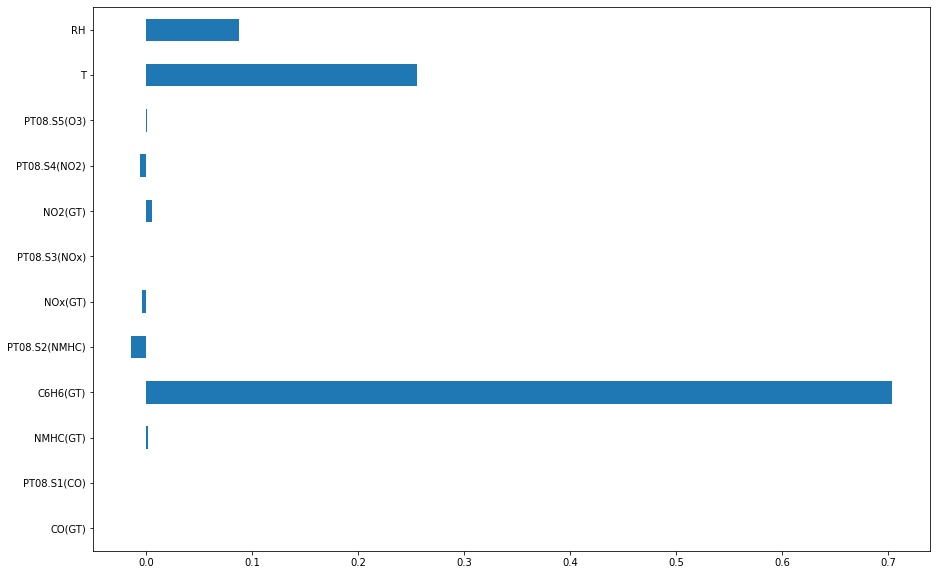

RSqure value for Elastic Net Regression Test Data is - 
ElasticNet Mean Square Error for Test Data is 


1.03

In [30]:
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

lm_elastic = ElasticNet()
lm_elastic.fit(X_train,y_train)

plt.figure(figsize=(15,10))
ft_importances_lm = pd.Series(lm_elastic.coef_,index = X.columns)
ft_importances_lm.plot(kind='barh')
plt.show()

print("RSqure value for Elastic Net Regression Test Data is - ")
np.round(lm_elastic.score(X_test,y_test)*100,2)

predict_test_elastic = lm_elastic.predict(X_test)


print("ElasticNet Mean Square Error for Test Data is ")
np.round(metrics.mean_squared_error(y_test,predict_test_elastic),2)

#Least-Angle Regression(LAR)

In [112]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=12)

reg.fit(X,y)

y_train_pred = reg.predict(X_train)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = reg.predict(X_test)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")


Metrics on Train samples
Multiple Regression score:  0.9993130770968721
Multiple Regression mean_squared_error:  1.0476306806498246
Multiple Regression mean_absolute_error:  0.7546644848181379
Metrics on Test samples
Multiple Regression score:  0.9992887909791771
Multiple Regression mean_squared_error:  1.0630113966425658
Multiple Regression mean_absolute_error:  0.7587304124472873


#Stochastic Gradient Regression

In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

sgd = SGDRegressor(max_iter=1, tol=1e-1)
sgd.fit(X_train, y_train)


y_train_pred = sgd.predict(X_train)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = sgd.predict(X_test)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")

Metrics on Train samples
Multiple Regression score:  -2.6348521083075016e+28
Multiple Regression mean_squared_error:  4.0184304454964514e+31
Multiple Regression mean_absolute_error:  6176777135238595.0
Metrics on Test samples
Multiple Regression score:  -2.690674828348161e+28
Multiple Regression mean_squared_error:  4.0216278526442184e+31
Multiple Regression mean_absolute_error:  6183573290871392.0


#MLPRegressor

In [52]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = model.predict(X_test)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")
print("==============================================================")

Metrics on Train samples
Multiple Regression score:  0.9993041449453784
Multiple Regression mean_squared_error:  1.0612531642013097
Multiple Regression mean_absolute_error:  0.7412220739799221
Metrics on Test samples
Multiple Regression score:  0.9993037198824903
Multiple Regression mean_squared_error:  1.0406978518241778
Multiple Regression mean_absolute_error:  0.7268044297782833


#PCA & Grid Search

Text(0, 0.5, 'Explained variance')

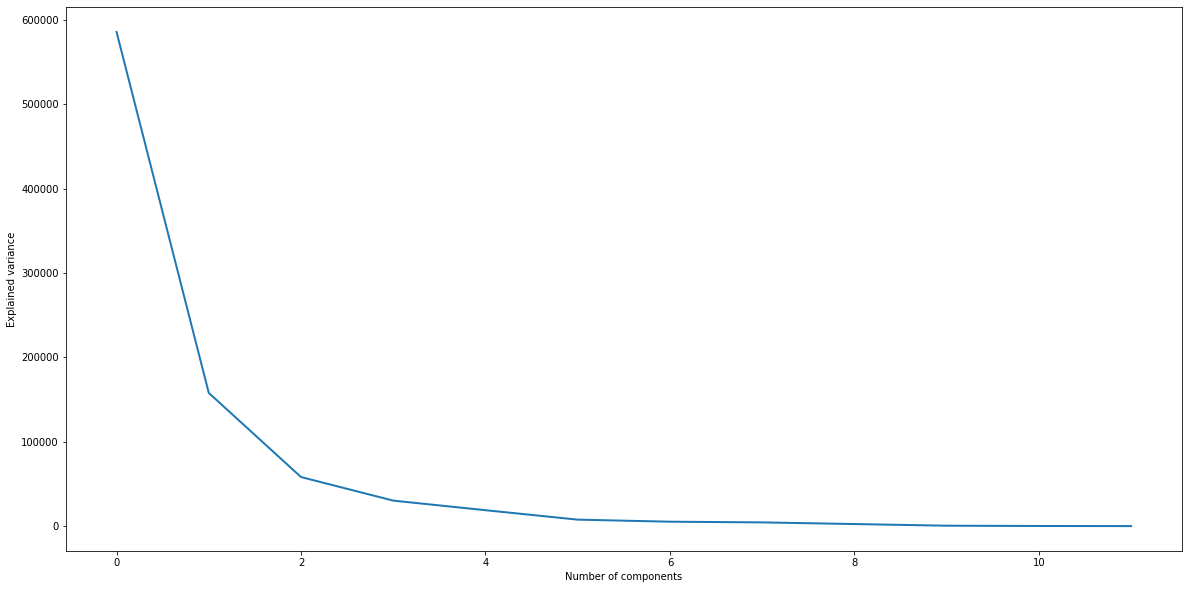

In [93]:
from sklearn import decomposition

# Plot PCA spectrum
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(20, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [87]:
from sklearn.pipeline import Pipeline

etr = ExtraTreesRegressor()

pipeline = Pipeline(steps=[('pca', pca), 
                           ('etr', etr)])

from sklearn.model_selection import GridSearchCV

print(pipeline.get_params())

{'memory': None, 'steps': [('pca', PCA()), ('etr', ExtraTreesRegressor())], 'verbose': False, 'pca': PCA(), 'etr': ExtraTreesRegressor(), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': None, 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'etr__bootstrap': False, 'etr__ccp_alpha': 0.0, 'etr__criterion': 'squared_error', 'etr__max_depth': None, 'etr__max_features': 'auto', 'etr__max_leaf_nodes': None, 'etr__max_samples': None, 'etr__min_impurity_decrease': 0.0, 'etr__min_samples_leaf': 1, 'etr__min_samples_split': 2, 'etr__min_weight_fraction_leaf': 0.0, 'etr__n_estimators': 100, 'etr__n_jobs': None, 'etr__oob_score': False, 'etr__random_state': None, 'etr__verbose': 0, 'etr__warm_start': False}


In [88]:
hyperparameters = {'etr__n_estimators' : [10,100,500],
                   'etr__max_depth' : [None, 20, 50],
                   'pca__n_components' : [9,19,39]}

clf = GridSearchCV(pipeline,
                   hyperparameters,
                   cv=10)

clf.fit(X_train, y_train)

# Best params
print(clf.best_params_)

{'etr__max_depth': None, 'etr__n_estimators': 10, 'pca__n_components': 9}


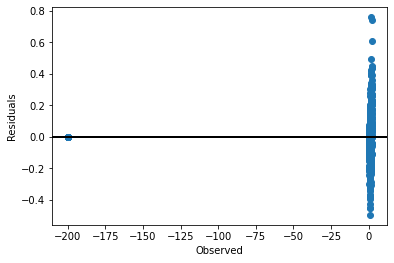

In [92]:
from sklearn.metrics import mean_squared_log_error

y_pred = clf.predict(X_test)

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')

plt.show()

#PCA Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [99]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

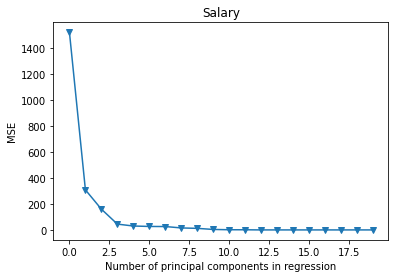

In [101]:
# 10-fold CV, with shuffle
n = len(X_reduced)
#n = 12
kf_10 = KFold(n, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Air Quality')
plt.xlim(xmin=-1);

In [102]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 47.91,  71.79,  83.01,  91.56,  94.83,  96.92,  97.96,  98.83,
        99.44,  99.76,  99.99, 100.01])

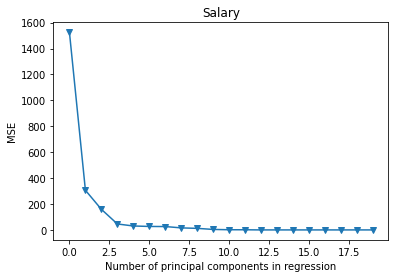

In [105]:
pca2 = PCA()

# Split into training and test sets
#X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Air Quality')
plt.xlim(xmin=-1);

In [106]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

16.925551835261086

#Partial Least Squares

(-1.0, 19.9)

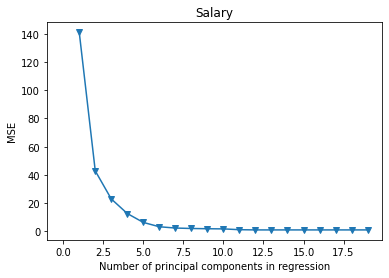

In [109]:
from sklearn.cross_decomposition import PLSRegression
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Air Quality')
plt.xlim(xmin=-1)

In [110]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

42.106096672467224

#Averaged base models class

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()

en.fit(X_train,y_train)

ElasticNet()

In [56]:
from sklearn.linear_model import Lasso
ls = Lasso()

ls.fit(X_train,y_train)

Lasso()

In [57]:
from sklearn.linear_model import Ridge
rd = Lasso()

rd.fit(X_train,y_train)


Lasso()

In [58]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

SGDRegressor()

In [59]:
from sklearn.linear_model import Lars
lar = Lars(n_nonzero_coefs=1)

lar.fit(X_train,y_train)

Lars(n_nonzero_coefs=1)

In [60]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=2)

kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [61]:
from sklearn.svm import SVR
s = SVR()

s.fit(X_train,y_train)


SVR()

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train,y_train)


RandomForestRegressor()

In [64]:
from sklearn.ensemble import BaggingRegressor
bg = BaggingRegressor()

bg.fit(X_train,y_train)


BaggingRegressor()

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [66]:
from xgboost import  XGBRegressor 

xbr = XGBRegressor()

xbr.fit(X_train,y_train)

[15:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [67]:
averaged_models = AveragingModels(models = (lr, en, ls,rd,sgd,lar,kn,s,dt,rf,bg,gbr,xbr))
print(averaged_models)

AveragingModels(models=(LinearRegression(), ElasticNet(), Lasso(), Lasso(),
                        SGDRegressor(), Lars(n_nonzero_coefs=1),
                        KNeighborsRegressor(n_neighbors=2), SVR(),
                        DecisionTreeRegressor(), RandomForestRegressor(),
                        BaggingRegressor(), GradientBoostingRegressor(),
                        XGBRegressor()))


In [68]:
averaged_models.fit(X_train, y_train)

[15:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


AveragingModels(models=(LinearRegression(), ElasticNet(), Lasso(), Lasso(),
                        SGDRegressor(), Lars(n_nonzero_coefs=1),
                        KNeighborsRegressor(n_neighbors=2), SVR(),
                        DecisionTreeRegressor(), RandomForestRegressor(),
                        BaggingRegressor(), GradientBoostingRegressor(),
                        XGBRegressor()))

In [69]:
y_train_pred = averaged_models.predict(X_train)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = averaged_models.predict(X_test)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")
print("==============================================================")

Metrics on Train samples
Multiple Regression score:  -1.8398346569921318e+24
Multiple Regression mean_squared_error:  2.8059440516704216e+27
Multiple Regression mean_absolute_error:  46256915068848.234
Metrics on Test samples
Multiple Regression score:  -1.8402292101583806e+24
Multiple Regression mean_squared_error:  2.7505059209870436e+27
Multiple Regression mean_absolute_error:  45685315721299.26


#Keras Network

In [37]:
#Linear Regression from keras

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


model = Sequential()
model.add(Dense(1,input_shape=(12,)))

model.summary()

model.compile(tf.keras.optimizers.Adam(lr=0.8),'mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X,y,epochs=400)

Epoch 1/400
293/293 [==============================] - 1s 1ms/step - loss: 249463.3906
Epoch 2/400
293/293 [==============================] - 0s 1ms/step - loss: 61.7773
Epoch 3/400
293/293 [==============================] - 0s 1ms/step - loss: 20.9229
Epoch 4/400
293/293 [==============================] - 0s 1ms/step - loss: 12.1679
Epoch 5/400
293/293 [==============================] - 0s 1ms/step - loss: 85.9846
Epoch 6/400
293/293 [==============================] - 0s 1ms/step - loss: 37999.5859
Epoch 7/400
293/293 [==============================] - 0s 1ms/step - loss: 3276.3640
Epoch 8/400
293/293 [==============================] - 0s 1ms/step - loss: 17715.9980
Epoch 9/400
293/293 [==============================] - 0s 1ms/step - loss: 8251.6182
Epoch 10/400
293/293 [==============================] - 0s 1ms/step - loss: 37156.7539
Epoch 11/400
293/293 [==============================] - 0s 1ms/step - loss: 18010.8516
Epoch 12/400
293/293 [==============================] - 0s 1ms/st

In [39]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
print("The Mean Squared Error on the Test set is: \t{:0.1f} ".format(mse(y_test,y_pred)))


print("The R2 score on the Test set is: \t{:0.3f} ".format(r2_score(y_test,y_pred)))

The Mean Squared Error on the Test set is: 	63.9 
The R2 score on the Test set is: 	0.957 


#ANN

In [115]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [116]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1664      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,529
Trainable params: 166,529
Non-trainable params: 0
_________________________________________________________________


In [117]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [118]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
179/188 [===========================>..] - ETA: 0s - loss: 2.4001 - mean_absolute_error: 2.4001
Epoch 00001: val_loss improved from inf to 0.59535, saving model to Weights-001--0.59535.hdf5
188/188 [==============================] - 2s 5ms/step - loss: 2.3415 - mean_absolute_error: 2.3415 - val_loss: 0.5953 - val_mean_absolute_error: 0.5953
Epoch 2/500
184/188 [============================>.] - ETA: 0s - loss: 0.6236 - mean_absolute_error: 0.6236
Epoch 00002: val_loss improved from 0.59535 to 0.35359, saving model to Weights-002--0.35359.hdf5
188/188 [==============================] - 1s 4ms/step - loss: 0.6180 - mean_absolute_error: 0.6180 - val_loss: 0.3536 - val_mean_absolute_error: 0.3536
Epoch 3/500
173/188 [==========================>...] - ETA: 0s - loss: 0.6864 - mean_absolute_error: 0.6864
Epoch 00003: val_loss did not improve from 0.35359
188/188 [==============================] - 1s 4ms/step - loss: 0.6613 - mean_absolute_error: 0.6613 - val_loss: 0.4510 - val_me

In [119]:
y_pred = NN_model.predict(X_test)
print(y_pred)

[[1.1168237 ]
 [1.3723457 ]
 [0.92598075]
 ...
 [1.6706116 ]
 [0.6054829 ]
 [1.5349393 ]]
